# Workshop 4 Spaceship Titanic

## Emilio and Saffian

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## EDA

In [2]:
# Read CSV file
train_data = pd.read_csv('../workshop_4_spaceship_titanic/train.csv')
test_data = pd.read_csv('../workshop_4_spaceship_titanic/test.csv')

#### Train Set

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train_data.describe(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


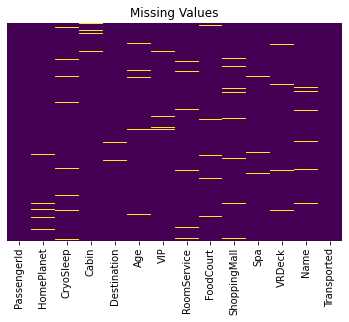

In [8]:
# Gráficos de correlaciones
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values")
plt.savefig('heatmaptraindata.png',bbox_inches='tight')

In [9]:
#sns.heatmap(data_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


## Missing Values

In [11]:
#columns with missing values
na_cols = train_data.columns[train_data.isna().any()].tolist()

#Missing values summary
mv = pd.DataFrame(train_data[na_cols].isna().sum() , columns = ['Number_missing'])
mv['Percentage_missing'] = np.round(100*mv['Number_missing']/len(train_data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


In [12]:
# VIP missing value equals no pay
train_data.loc[train_data.VIP.isnull(), 'VIP'] = False
train_data.VIP.replace([True, False], [1,0], inplace=True)

# VIP missing value equals no pay
test_data.loc[test_data.VIP.isnull(), 'VIP'] = False
test_data.VIP.replace([True, False], [1,0], inplace=True)

In [13]:
train_data['group'] = train_data['PassengerId'].apply(lambda x: x.split('_')[0])
train_data['id_group'] = train_data['PassengerId'].apply(lambda x: x.split('_')[1])

test_data['group'] = test_data['PassengerId'].apply(lambda x: x.split('_')[0])
test_data['id_group'] = test_data['PassengerId'].apply(lambda x: x.split('_')[1])

In [14]:
# Replace NaN's with outliers for now (so we can split feature)
train_data['Cabin'].fillna('Z/9999/Z', inplace=True)
test_data['Cabin'].fillna('Z/9999/Z', inplace=True)

# New features - training set
train_data['Cabin_deck'] = train_data['Cabin'].apply(lambda x: x.split('/')[0])
train_data['Cabin_number'] = train_data['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
train_data['Cabin_side'] = train_data['Cabin'].apply(lambda x: x.split('/')[2])
test_data['Cabin_deck'] = test_data['Cabin'].apply(lambda x: x.split('/')[0])
test_data['Cabin_number'] = test_data['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
test_data['Cabin_side'] = test_data['Cabin'].apply(lambda x: x.split('/')[2])
# Put Nan's back in (we will fill these later)
train_data.loc[train_data['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
train_data.loc[train_data['Cabin_number']==9999, 'Cabin_number']=np.nan
train_data.loc[train_data['Cabin_side']=='Z', 'Cabin_side']=np.nan
test_data.loc[test_data['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
test_data.loc[test_data['Cabin_number']==9999, 'Cabin_number']=np.nan
test_data.loc[test_data['Cabin_side']=='Z', 'Cabin_side']=np.nan

In [15]:
# Fill destination and homeplanet with mode from group
train_data['HomePlanet'] = train_data.groupby('group')[['HomePlanet']].apply(lambda x : x.ffill().bfill())
train_data['Destination'] = train_data.groupby('group')[['Destination']].apply(lambda x : x.ffill().bfill())
train_data['CryoSleep'] = train_data.groupby('group')[['CryoSleep']].apply(lambda x : x.ffill().bfill())
test_data['HomePlanet'] = test_data.groupby('group')[['HomePlanet']].apply(lambda x : x.ffill().bfill())
test_data['Destination'] = test_data.groupby('group')[['Destination']].apply(lambda x : x.ffill().bfill())
test_data['CryoSleep'] = test_data.groupby('group')[['CryoSleep']].apply(lambda x : x.ffill().bfill())

In [16]:
# Rest of missing values have no group
train_data[train_data['HomePlanet'].isnull()&train_data['id_group']>1] 
train_data[train_data['Destination'].isnull()&train_data['id_group']>1] 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group,id_group,Cabin_deck,Cabin_number,Cabin_side


In [17]:
#Filling missing values - with Earth if not on deck D and mars if on deck D
train_data.loc[(train_data['HomePlanet'].isna()) & (train_data['Cabin_deck']=='G') , "HomePlanet"] = 'Earth'
train_data.loc[(train_data['HomePlanet'].isna()) & (train_data['Cabin_deck'].isin(['A' , "B" , 'C' ,'T'])) , "HomePlanet"] = 'Europa'
test_data.loc[(test_data['HomePlanet'].isna()) & (test_data['Cabin_deck']=='G') , "HomePlanet"] = 'Earth'
test_data.loc[(test_data['HomePlanet'].isna()) & (test_data['Cabin_deck'].isin(['A' , "B" , 'C' ,'T'])) , "HomePlanet"] = 'Europa'

In [18]:
train_data.loc[(train_data['Destination'].isna()) & (train_data['HomePlanet']=='Earth') , "Destination"] = 'TRAPPIST-1e'
train_data.loc[(train_data['Destination'].isna()) & (train_data['HomePlanet']=='Mars') , "Destination"] = 'TRAPPIST-1e'
test_data.loc[(test_data['Destination'].isna()) & (test_data['HomePlanet']=='Earth') , "Destination"] = 'TRAPPIST-1e'
test_data.loc[(test_data['Destination'].isna()) & (test_data['HomePlanet']=='Mars') , "Destination"] = 'TRAPPIST-1e'

In [19]:
# fill with mode
train_data.loc[train_data.RoomService.isnull(), 'RoomService'] = 0 
train_data.loc[train_data.FoodCourt.isnull(), 'FoodCourt'] = 0 
train_data.loc[train_data.ShoppingMall.isnull(), 'ShoppingMall'] = 0 
train_data.loc[train_data.Spa.isnull(), 'Spa'] = 0 
train_data.loc[train_data.VRDeck.isnull(), 'VRDeck'] = 0 

test_data.loc[test_data.RoomService.isnull(), 'RoomService'] = 0 
test_data.loc[test_data.FoodCourt.isnull(), 'FoodCourt'] = 0 
test_data.loc[test_data.ShoppingMall.isnull(), 'ShoppingMall'] = 0 
test_data.loc[test_data.Spa.isnull(), 'Spa'] = 0 
test_data.loc[test_data.VRDeck.isnull(), 'VRDeck'] = 0 

# Fill with unkown
train_data.loc[train_data.Name.isnull(), 'Name'] = 'Unknown'

In [20]:
train_data['Spending']=train_data['RoomService']+train_data['FoodCourt']+train_data['ShoppingMall']+train_data['Spa']+train_data['VRDeck']
test_data['Spending']=test_data['RoomService']+test_data['FoodCourt']+test_data['ShoppingMall']+test_data['Spa']+test_data['VRDeck']

In [21]:
train_data.loc[(train_data['CryoSleep'].isna()) & (train_data['Spending']>0) , "CryoSleep"] = 0
train_data.loc[(train_data['CryoSleep'].isna()) & (train_data['Spending']==0) , "CryoSleep"] = 1
test_data.loc[(test_data['CryoSleep'].isna()) & (test_data['Spending']>0) , "CryoSleep"] = 0
test_data.loc[(test_data['CryoSleep'].isna()) & (test_data['Spending']==0) , "CryoSleep"] = 1

In [22]:
#Joint Distribution
train_data.groupby(['HomePlanet' , 'Cabin_deck'])['Age'].median().unstack().fillna(0)
test_data.groupby(['HomePlanet' , 'Cabin_deck'])['Age'].median().unstack().fillna(0)

Cabin_deck,A,B,C,D,E,F,G,T
HomePlanet,,,,,,,,
Earth,0.0,0.0,0.0,0.0,25.0,24.0,22.0,0.0
Europa,33.0,31.0,33.0,31.0,35.0,0.0,0.0,31.0
Mars,0.0,0.0,0.0,29.0,28.0,27.0,0.0,0.0


In [23]:
# replace values in Age category with average age of passenger of each class
lst1=[]
lst2=[]
lst3=[]
n=len(train_data.Transported)
i=1
while i< n:
    if train_data['HomePlanet'][i]=='Earth' and pd.isnull(train_data['Age'][i]) == False:
        lst1.append(train_data['Age'][i])
    elif train_data['HomePlanet'][i]=='Europa'  and pd.isnull(train_data['Age'][i]) == False:
        lst2.append(train_data['Age'][i])
    elif train_data['HomePlanet'][i]=='Mars' and pd.isnull(train_data['Age'][i]) == False :
        lst3.append(train_data['Age'][i])
    i+=1

Mean_Earth = sum(lst1)/len(lst1)
Mean_Europa = sum(lst2)/len(lst2)
Mean_Mars = sum(lst3)/len(lst3)


def impute (col):
    Age= col[0]
    HomePlanet = col[1]
    
    if pd.isnull(Age):
        
        if HomePlanet =='Earth':
            return Mean_Earth
        elif HomePlanet =='Europa':
            return Mean_Europa
        else:
            return Mean_Mars
    else:
        return Age
    

# Apply mean to data missing
train_data.Age= train_data[['Age', 'HomePlanet']].apply(impute, axis=1)
test_data.Age= test_data[['Age', 'HomePlanet']].apply(impute, axis=1)

In [24]:
#columns with missing values
na_cols = train_data.columns[train_data.isna().any()].tolist()

#Missing values summary
mv = pd.DataFrame(train_data[na_cols].isna().sum() , columns = ['Number_missing'])
mv['Percentage_missing'] = np.round(100*mv['Number_missing']/len(train_data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,63,0.72
Destination,17,0.20
Cabin_deck,199,2.29
Cabin_number,199,2.29
Cabin_side,199,2.29


In [25]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group,id_group,Cabin_deck,Cabin_number,Cabin_side,Spending
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0.0,P,0.0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0.0,S,736.0
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0.0,S,10383.0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0.0,S,5176.0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1.0,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0.0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01,A,98.0,P,8536.0
8689,9278_01,Earth,1.0,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01,G,1499.0,S,0.0
8690,9279_01,Earth,0.0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01,G,1500.0,S,1873.0
8691,9280_01,Europa,0.0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01,E,608.0,S,4637.0


In [26]:
train_data['Cabin_deck'] = train_data.groupby('group')[['Cabin_deck']].apply(lambda x : x.ffill().bfill())
train_data['Cabin_number'] = train_data.groupby('group')[['Cabin_number']].apply(lambda x : x.ffill().bfill())
train_data['Cabin_side'] = train_data.groupby('group')[['Cabin_side']].apply(lambda x : x.ffill().bfill())
test_data['Cabin_deck'] = test_data.groupby('group')[['Cabin_deck']].apply(lambda x : x.ffill().bfill())
test_data['Cabin_number'] = test_data.groupby('group')[['Cabin_number']].apply(lambda x : x.ffill().bfill())
test_data['Cabin_side'] = test_data.groupby('group')[['Cabin_side']].apply(lambda x : x.ffill().bfill())

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8630 non-null   object 
 2   CryoSleep     8693 non-null   float64
 3   Cabin         8693 non-null   object 
 4   Destination   8676 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  group         8693 non-null   object 
 15  id_group      8693 non-null   object 
 16  Cabin_deck    8594 non-null   object 
 17  Cabin_number  8594 non-null   float64
 18  Cabin_side    8594 non-null 

In [28]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8519 non-null   object 
 1   HomePlanet    8519 non-null   object 
 2   CryoSleep     8519 non-null   float64
 3   Cabin         8519 non-null   object 
 4   Destination   8519 non-null   object 
 5   Age           8519 non-null   float64
 6   VIP           8519 non-null   int64  
 7   RoomService   8519 non-null   float64
 8   FoodCourt     8519 non-null   float64
 9   ShoppingMall  8519 non-null   float64
 10  Spa           8519 non-null   float64
 11  VRDeck        8519 non-null   float64
 12  Name          8519 non-null   object 
 13  Transported   8519 non-null   bool   
 14  group         8519 non-null   object 
 15  id_group      8519 non-null   object 
 16  Cabin_deck    8519 non-null   object 
 17  Cabin_number  8519 non-null   float64
 18  Cabin_side    8519 non-null 

In [30]:
train_data['Cabin_side'].unique()

array(['P', 'S'], dtype=object)

In [31]:
train_data['Spend_Category'] = ''
train_data.loc[train_data['Spending'].between(0, 1, 'left'), 'Spend_Category'] = 'Zero_Spend'
train_data.loc[train_data['Spending'].between(1, 800, 'both'), 'Spend_Category'] = 'Under_800'
train_data.loc[train_data['Spending'].between(800, 1200, 'right'), 'Spend_Category'] = 'Median_1200'
train_data.loc[train_data['Spending'].between(1200, 2700, 'right'), 'Spend_Category'] = 'Upper_2700'
train_data.loc[train_data['Spending'].between(2700, 100000, 'right'), 'Spend_Category'] = 'Big_Spender'
train_data['Spend_Category'] = train_data['Spend_Category'].astype('category').cat.codes.astype("int")    

train_data['Age_Category'] = ''
train_data.loc[train_data['Age'].between(0, 18, 'both'), 'Age_Category'] = 'Under_18'
train_data.loc[train_data['Age'].between(18, 40, 'right'), 'Age_Category'] = 'Adult'
train_data.loc[train_data['Age'].between(40, 60, 'right'), 'Age_Category'] = 'Middle_Age'
train_data.loc[train_data['Age'].between(60, 100, 'right'), 'Age_Category'] = 'Over_60'
train_data['Age_Category'] = train_data['Age_Category'].astype('category').cat.codes.astype("int") 

<AxesSubplot:ylabel='Age'>

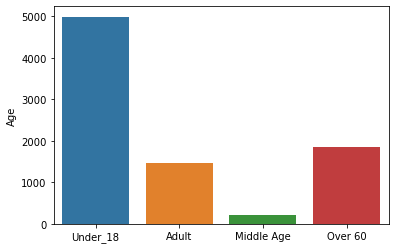

In [32]:
sns.barplot(x=['Under_18', 'Adult','Middle Age', 'Over 60'],y=train_data.groupby('Age_Category')['Age'].count())

<AxesSubplot:ylabel='Spending'>

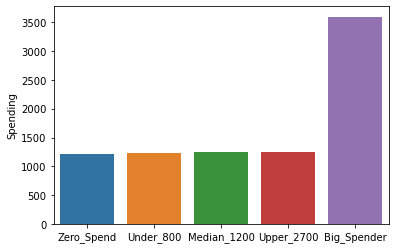

In [33]:
sns.barplot(x=['Zero_Spend', 'Under_800','Median_1200', 'Upper_2700', 'Big_Spender'],y=train_data.groupby('Spend_Category')['Spending'].count())

In [34]:
train_data['VIP'] = train_data['VIP'].apply(lambda x: 1 if x else 0)

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8692
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8519 non-null   object 
 1   HomePlanet      8519 non-null   object 
 2   CryoSleep       8519 non-null   float64
 3   Cabin           8519 non-null   object 
 4   Destination     8519 non-null   object 
 5   Age             8519 non-null   float64
 6   VIP             8519 non-null   int64  
 7   RoomService     8519 non-null   float64
 8   FoodCourt       8519 non-null   float64
 9   ShoppingMall    8519 non-null   float64
 10  Spa             8519 non-null   float64
 11  VRDeck          8519 non-null   float64
 12  Name            8519 non-null   object 
 13  Transported     8519 non-null   bool   
 14  group           8519 non-null   object 
 15  id_group        8519 non-null   object 
 16  Cabin_deck      8519 non-null   object 
 17  Cabin_number    8519 non-null   f

In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4085 entries, 0 to 4276
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4085 non-null   object 
 1   HomePlanet    4085 non-null   object 
 2   CryoSleep     4085 non-null   float64
 3   Cabin         4085 non-null   object 
 4   Destination   4085 non-null   object 
 5   Age           4085 non-null   float64
 6   VIP           4085 non-null   int64  
 7   RoomService   4085 non-null   float64
 8   FoodCourt     4085 non-null   float64
 9   ShoppingMall  4085 non-null   float64
 10  Spa           4085 non-null   float64
 11  VRDeck        4085 non-null   float64
 12  Name          4085 non-null   object 
 13  group         4085 non-null   object 
 14  id_group      4085 non-null   object 
 15  Cabin_deck    4085 non-null   object 
 16  Cabin_number  4085 non-null   float64
 17  Cabin_side    4085 non-null   object 
 18  Spending      4085 non-null 

In [37]:
train_data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,group,id_group,Cabin_deck,Cabin_number,Cabin_side,Spending,Spend_Category,Age_Category
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,...,Maham Ofracculy,False,0001,01,B,0.0,P,0.0,4,0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,...,Juanna Vines,True,0002,01,F,0.0,S,736.0,2,0
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,...,Altark Susent,False,0003,01,A,0.0,S,10383.0,0,1
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,...,Solam Susent,False,0003,02,A,0.0,S,5176.0,0,0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,...,Willy Santantines,True,0004,01,F,1.0,S,1091.0,1,3
5,0005_01,Earth,0.0,F/0/P,PSO J318.5-22,44.0,0,0.0,483.0,0.0,...,Sandie Hinetthews,True,0005,01,F,0.0,P,774.0,2,1
6,0006_01,Earth,0.0,F/2/S,TRAPPIST-1e,26.0,0,42.0,1539.0,3.0,...,Billex Jacostaffey,True,0006,01,F,2.0,S,1584.0,3,0
7,0006_02,Earth,1.0,G/0/S,TRAPPIST-1e,28.0,0,0.0,0.0,0.0,...,Candra Jacostaffey,True,0006,02,G,0.0,S,0.0,4,0
8,0007_01,Earth,0.0,F/3/S,TRAPPIST-1e,35.0,0,0.0,785.0,17.0,...,Andona Beston,True,0007,01,F,3.0,S,1018.0,1,0
9,0008_01,Europa,1.0,B/1/P,55 Cancri e,14.0,0,0.0,0.0,0.0,...,Erraiam Flatic,True,0008,01,B,1.0,P,0.0,4,3


In [38]:
train_data['Cabin_number'].unique()



array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.893e+03, 1.504e+03,
       1.894e+03])

# Machine Learning

In [40]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  ParameterGrid
from sklearn.metrics import make_scorer
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [41]:
X = train_data.drop(['Name', 'Transported', 'Cabin', 'PassengerId','Age', 'Cabin_number', 'Spending', 'group', 'id_group','RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck'], axis=1)
y = train_data['Transported']
#y = target.astype(int)

X = pd.get_dummies(data=X, columns=['HomePlanet','Destination','Cabin_deck','Cabin_side'])

In [112]:
X.head()

,CryoSleep,VIP,Spend_Category,Age_Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,0.0,0,4,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,0.0,0,2,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0.0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,0.0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
4,0.0,0,1,3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [113]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8519 non-null   float64
 1   VIP                        8519 non-null   int64  
 2   Spend_Category             8519 non-null   int32  
 3   Age_Category               8519 non-null   int32  
 4   HomePlanet_Earth           8519 non-null   uint8  
 5   HomePlanet_Europa          8519 non-null   uint8  
 6   HomePlanet_Mars            8519 non-null   uint8  
 7   Destination_55 Cancri e    8519 non-null   uint8  
 8   Destination_PSO J318.5-22  8519 non-null   uint8  
 9   Destination_TRAPPIST-1e    8519 non-null   uint8  
 10  Cabin_deck_A               8519 non-null   uint8  
 11  Cabin_deck_B               8519 non-null   uint8  
 12  Cabin_deck_C               8519 non-null   uint8  
 13  Cabin_deck_D               8519 non-null   uint8

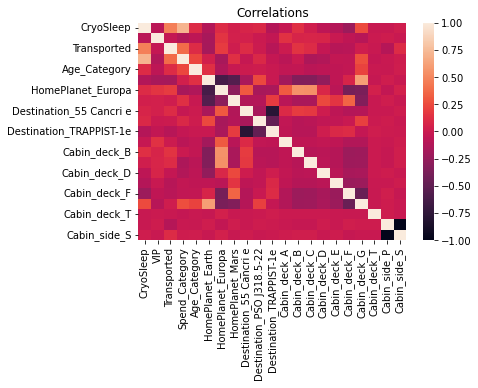

In [42]:
sns.heatmap(X.corr()).set(title="Correlations")
plt.savefig('Correlations_cleaned.png',bbox_inches='tight')

In [115]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE

In [116]:
X_train, X_eval, y_train, y_eval = train_test_split(X,y,test_size=0.3)

In [117]:
X_train.shape

(5963, 20)

All features:
['CryoSleep' 'VIP' 'Spend_Category' 'Age_Category' 'HomePlanet_Earth'
 'HomePlanet_Europa' 'HomePlanet_Mars' 'Destination_55 Cancri e'
 'Destination_PSO J318.5-22' 'Destination_TRAPPIST-1e' 'Cabin_deck_A'
 'Cabin_deck_B' 'Cabin_deck_C' 'Cabin_deck_D' 'Cabin_deck_E'
 'Cabin_deck_F' 'Cabin_deck_G' 'Cabin_deck_T' 'Cabin_side_P'
 'Cabin_side_S']
Selected best 5:
['CryoSleep' 'Spend_Category' 'Age_Category' 'HomePlanet_Europa'
 'Cabin_deck_B']


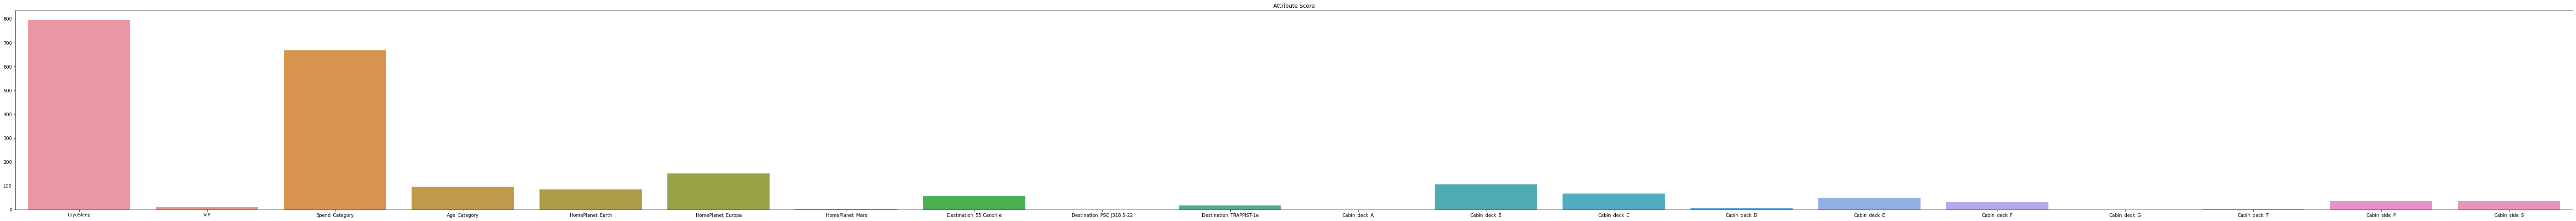

In [120]:

# feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X_train, y_train)
# summarize scores
features = fit.transform(X)
plt.figure(figsize=(100,8))
sns.barplot(x=X_train.columns, y = fit.scores_).set(title="Attribute Score")
plt.savefig('attribute_selection.png',bbox_inches='tight')

from numpy import array


filter = test.get_support()
all_features = array(X_train.columns)
 
print("All features:")
print(all_features)
 
print("Selected best 5:")
print(all_features[filter])

In [121]:
scaler=StandardScaler()
Scaled_X = scaler.fit_transform(X)

## Naive Bayes

In [122]:
X.head()

,CryoSleep,VIP,Spend_Category,Age_Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,0.0,0,4,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,0.0,0,2,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0.0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,0.0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
4,0.0,0,1,3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [123]:
features.shape

(8519, 5)

In [124]:
gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, Scaled_X, y, cv = 100)
gnb_scores

array([0.62790698, 0.72093023, 0.75581395, 0.65116279, 0.77906977,
       0.65116279, 0.74418605, 0.6744186 , 0.76744186, 0.6627907 ,
       0.74418605, 0.74418605, 0.60465116, 0.68604651, 0.73255814,
       0.70930233, 0.73255814, 0.70930233, 0.6744186 , 0.71764706,
       0.65882353, 0.62352941, 0.64705882, 0.71764706, 0.78823529,
       0.81176471, 0.71764706, 0.70588235, 0.64705882, 0.50588235,
       0.70588235, 0.78823529, 0.72941176, 0.76470588, 0.71764706,
       0.75294118, 0.75294118, 0.71764706, 0.63529412, 0.67058824,
       0.75294118, 0.72941176, 0.65882353, 0.67058824, 0.70588235,
       0.67058824, 0.69411765, 0.75294118, 0.68235294, 0.72941176,
       0.6       , 0.64705882, 0.70588235, 0.72941176, 0.74117647,
       0.62352941, 0.65882353, 0.72941176, 0.76470588, 0.71764706,
       0.71764706, 0.63529412, 0.75294118, 0.72941176, 0.77647059,
       0.64705882, 0.70588235, 0.76470588, 0.70588235, 0.76470588,
       0.75294118, 0.68235294, 0.72941176, 0.70588235, 0.72941

In [125]:
bnb = BernoulliNB()
bnb_scores = cross_val_score(bnb, Scaled_X, y, cv = 100)
bnb_scores

array([0.60465116, 0.72093023, 0.75581395, 0.65116279, 0.74418605,
       0.72093023, 0.75581395, 0.68604651, 0.75581395, 0.6627907 ,
       0.70930233, 0.72093023, 0.68604651, 0.70930233, 0.70930233,
       0.69767442, 0.74418605, 0.72093023, 0.6627907 , 0.75294118,
       0.69411765, 0.65882353, 0.68235294, 0.69411765, 0.77647059,
       0.78823529, 0.70588235, 0.69411765, 0.67058824, 0.78823529,
       0.70588235, 0.81176471, 0.76470588, 0.71764706, 0.72941176,
       0.70588235, 0.74117647, 0.71764706, 0.62352941, 0.65882353,
       0.72941176, 0.75294118, 0.67058824, 0.71764706, 0.71764706,
       0.72941176, 0.67058824, 0.74117647, 0.69411765, 0.74117647,
       0.62352941, 0.69411765, 0.70588235, 0.72941176, 0.70588235,
       0.63529412, 0.69411765, 0.72941176, 0.77647059, 0.69411765,
       0.69411765, 0.64705882, 0.75294118, 0.70588235, 0.74117647,
       0.62352941, 0.68235294, 0.75294118, 0.68235294, 0.68235294,
       0.71764706, 0.70588235, 0.71764706, 0.72941176, 0.76470

In [126]:
mnb = MultinomialNB()
mnb_scores = cross_val_score(mnb, X, y, cv = 100)
mnb_scores

array([0.62790698, 0.70930233, 0.75581395, 0.6627907 , 0.77906977,
       0.70930233, 0.72093023, 0.6627907 , 0.75581395, 0.65116279,
       0.73255814, 0.70930233, 0.65116279, 0.70930233, 0.75581395,
       0.72093023, 0.73255814, 0.68604651, 0.65116279, 0.76470588,
       0.69411765, 0.63529412, 0.63529412, 0.71764706, 0.77647059,
       0.77647059, 0.70588235, 0.69411765, 0.64705882, 0.78823529,
       0.70588235, 0.8       , 0.74117647, 0.75294118, 0.75294118,
       0.74117647, 0.77647059, 0.75294118, 0.61176471, 0.67058824,
       0.75294118, 0.70588235, 0.64705882, 0.70588235, 0.71764706,
       0.72941176, 0.69411765, 0.75294118, 0.69411765, 0.72941176,
       0.62352941, 0.67058824, 0.68235294, 0.69411765, 0.71764706,
       0.63529412, 0.64705882, 0.71764706, 0.75294118, 0.69411765,
       0.69411765, 0.65882353, 0.75294118, 0.71764706, 0.76470588,
       0.63529412, 0.67058824, 0.75294118, 0.70588235, 0.71764706,
       0.72941176, 0.65882353, 0.74117647, 0.72941176, 0.76470

<AxesSubplot:>

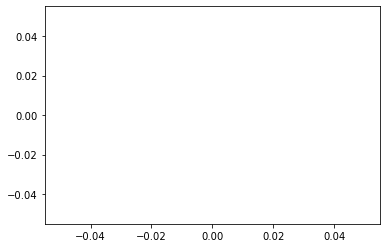

In [159]:
sns.lineplot(gnb_scores)
sns.lineplot(bnb_scores)
sns.lineplot(mnb_scores)

In [128]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=0.3)
gnb = GaussianNB()
gnb.fit(X_train,y_train)

gnb_scores = cross_val_score(gnb, X, y, cv = 10)
gnb_scores

array([0.6971831 , 0.7100939 , 0.51760563, 0.71948357, 0.69483568,
       0.69366197, 0.71713615, 0.73356808, 0.7370892 , 0.70975323])

In [129]:
#Varying sample size
sample_size = range(100,8500,500)
mean_sample = []
std_sample = []

for i in sample_size:
    gnb = GaussianNB()
    gnb.fit(X[0:i],y[0:i])
    gnb_scores = cross_val_score(gnb, X[0:i], y[0:i], cv=10)
    mean_sample.append(np.mean(gnb_scores))
    std_sample.append(np.std(gnb_scores))

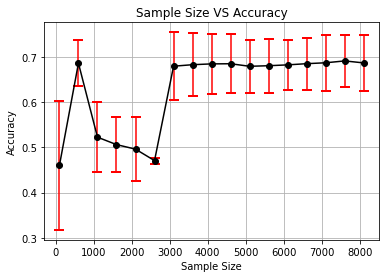

In [132]:
plt.errorbar(sample_size, mean_sample, std_sample, fmt='-o', color='black', ecolor = 'red', capthick = 2, capsize = 5)

plt.title("Sample Size VS Accuracy")
plt.xlabel("Sample Size")
plt.ylabel("Accuracy")

plt.grid()
plt.savefig('nb_sampleSize_acc.png',bbox_inches='tight')
plt.show()


In [133]:
# Varying folds
cross_validation = range(2,20)
mean_cv = []
std_cv = []

for i in cross_validation:
    gnb = GaussianNB()
    gnb.fit(X,y)
    gnb_scores = cross_val_score(gnb, X, y, cv=i)
    mean_cv.append(np.mean(gnb_scores))
    std_cv.append(np.std(gnb_scores))

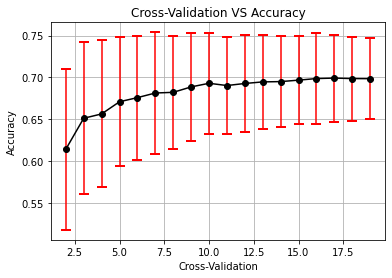

In [134]:
plt.errorbar(cross_validation, mean_cv, std_cv, fmt='-o', color='black', ecolor = 'red', capthick = 2, capsize = 5)

plt.title("Cross-Validation VS Accuracy")
plt.xlabel("Cross-Validation")
plt.ylabel("Accuracy")

plt.grid()
plt.savefig('nb_cv_acc.png',bbox_inches='tight')
plt.show()

In [135]:
# varying time vs attributes

featureArray = []
for i in range(1,21):    
    # feature extraction
    select = SelectKBest(score_func=chi2, k=i)
    fit = select.fit(X, y)
    # summarize scores
    features = fit.transform(X)
    filter = select.get_support()
    features = array(X.columns)
    featureArray.append(features[filter])
    
cv = 10
mean_att = []
std_att = []
mean_att_time = []
std_att_time = []
for i in featureArray:
    data = X[i]
    gnb = GaussianNB()
    scores = cross_val_score(gnb, data, y, scoring='accuracy', cv=cv)
    mean_att.append(np.mean(scores))
    std_att.append(np.std(scores))
    
    scores = cross_validate(gnb, data, y, scoring='precision_macro',cv=cv)
    mean_att_time.append(np.mean(scores['fit_time']))
    std_att_time.append(np.std(scores['fit_time']))

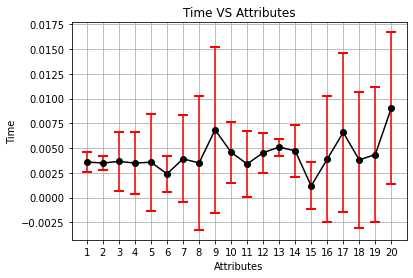

In [136]:
plt.errorbar(["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"], mean_att_time, std_att_time, fmt='-o', color='black', ecolor = 'red', capthick = 2, capsize = 5)

plt.title("Time VS Attributes")
plt.xlabel("Attributes")
plt.ylabel("Time")

plt.grid()
plt.savefig('nb_time_attributes.png',bbox_inches='tight')
plt.show()

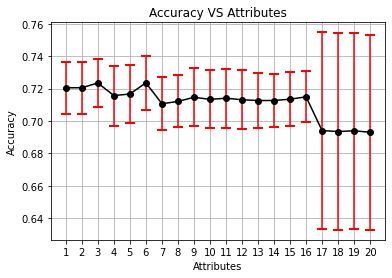

In [137]:
plt.errorbar(["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"], mean_att, std_att, fmt='-o', color='black', ecolor = 'red', capthick = 2, capsize = 5)

plt.title("Accuracy VS Attributes")
plt.xlabel("Attributes")
plt.ylabel("Accuracy")

plt.grid()
plt.savefig('nb_att_acc.png',bbox_inches='tight')
plt.show()

In [139]:
featureArray

[array(['CryoSleep'], dtype=object),
 array(['CryoSleep', 'Spend_Category'], dtype=object),
 array(['CryoSleep', 'Spend_Category', 'HomePlanet_Europa'], dtype=object),
 array(['CryoSleep', 'Spend_Category', 'HomePlanet_Europa', 'Cabin_deck_B'],
       dtype=object),
 array(['CryoSleep', 'Spend_Category', 'Age_Category', 'HomePlanet_Europa',
        'Cabin_deck_B'], dtype=object),
 array(['CryoSleep', 'Spend_Category', 'Age_Category', 'HomePlanet_Earth',
        'HomePlanet_Europa', 'Cabin_deck_B'], dtype=object),
 array(['CryoSleep', 'Spend_Category', 'Age_Category', 'HomePlanet_Earth',
        'HomePlanet_Europa', 'Cabin_deck_B', 'Cabin_deck_C'], dtype=object),
 array(['CryoSleep', 'Spend_Category', 'Age_Category', 'HomePlanet_Earth',
        'HomePlanet_Europa', 'Destination_55 Cancri e', 'Cabin_deck_B',
        'Cabin_deck_C'], dtype=object),
 array(['CryoSleep', 'Spend_Category', 'Age_Category', 'HomePlanet_Earth',
        'HomePlanet_Europa', 'Destination_55 Cancri e', 'Cabin_deck

## Decision trees

In [160]:
#Normal decision tree
dtc = DecisionTreeClassifier()
dtc.fit(X,y)
dtc_scores = cross_val_score(dtc, X, y, cv = 10)

print('Accuracy for all folds:', dtc_scores)
print('Mean accuracy:', round(np.mean(dtc_scores),2))
print('Standard deviation:', round(np.std(dtc_scores),2))

Accuracy for all folds: [0.73474178 0.71948357 0.72769953 0.74647887 0.72535211 0.72065728
 0.75       0.75821596 0.75352113 0.72385429]
Mean accuracy: 0.74
Standard deviation: 0.01


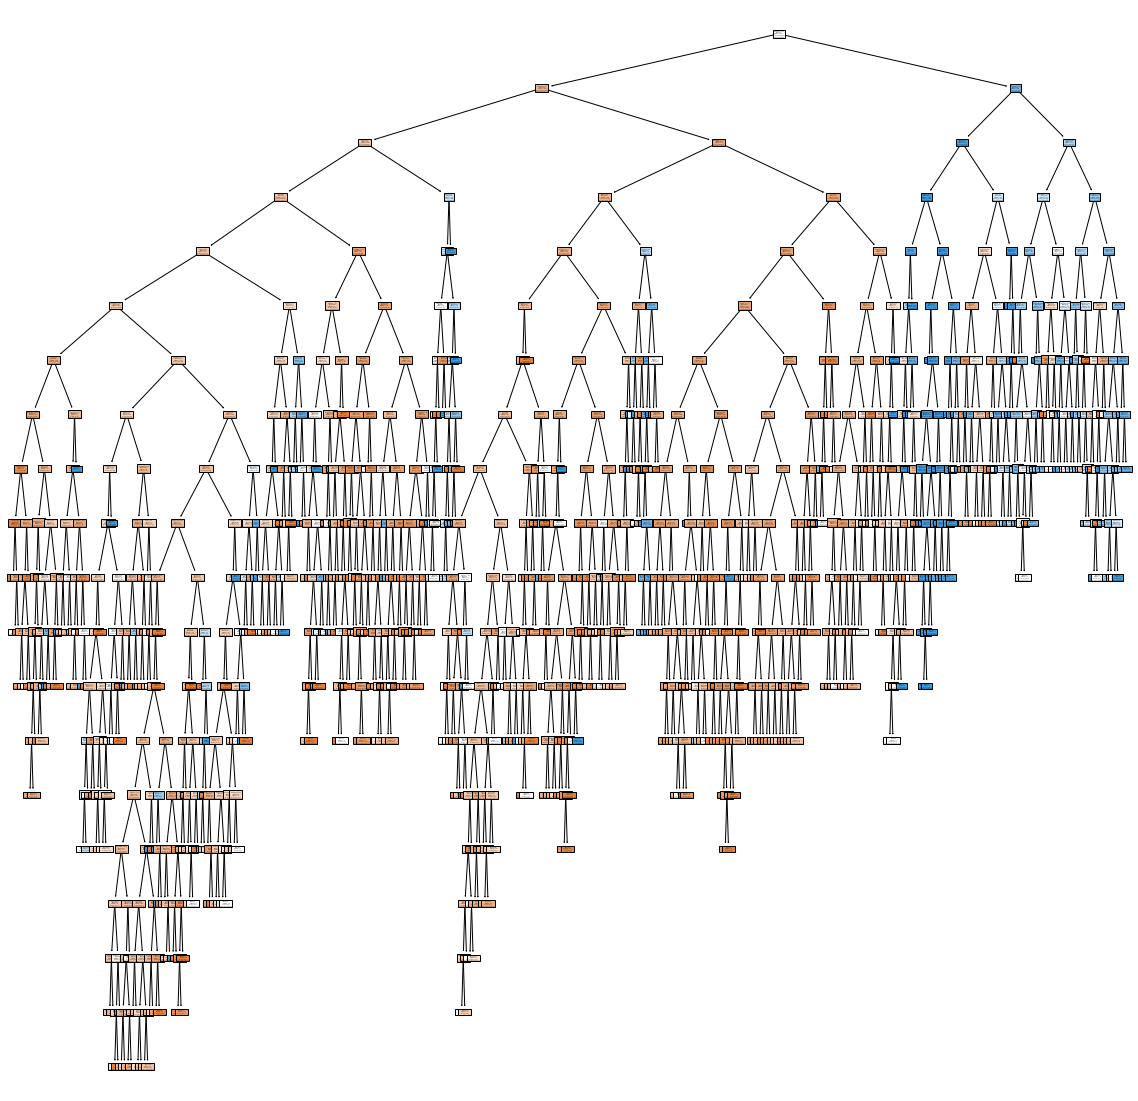

In [165]:
plt.figure(figsize=(20,20))
features = train_data.columns
classes = ['Not Transported','Transported']
tree.plot_tree(dtc,feature_names=features,class_names=classes,filled=True)
plt.show()

## Attributes vs performance

In [141]:
featureArray = []
for i in range(1,21):    
    # feature extraction
    select = SelectKBest(score_func=chi2, k=i)
    fit = select.fit(X, y)
    # summarize scores
    features = fit.transform(X)
    filter = select.get_support()
    features = array(X.columns)
    featureArray.append(features[filter])
    
cv = 10
mean_att = []
std_att = []
for i in featureArray:
    data = X[i]
    dtc = DecisionTreeClassifier()
    scores = cross_val_score(dtc, data, y, scoring='accuracy', cv=cv)
    mean_att.append(np.mean(scores))
    std_att.append(np.std(scores))
    print(i)
    print('Mean accuracy:', round(np.mean(scores),3))
    print('Standard deviation:', round(np.std(scores),3))
    print("\n")

['CryoSleep']
Mean accuracy: 0.721
Standard deviation: 0.016


['CryoSleep' 'Spend_Category']
Mean accuracy: 0.737
Standard deviation: 0.02


['CryoSleep' 'Spend_Category' 'HomePlanet_Europa']
Mean accuracy: 0.737
Standard deviation: 0.02


['CryoSleep' 'Spend_Category' 'HomePlanet_Europa' 'Cabin_deck_B']
Mean accuracy: 0.736
Standard deviation: 0.019


['CryoSleep' 'Spend_Category' 'Age_Category' 'HomePlanet_Europa'
 'Cabin_deck_B']
Mean accuracy: 0.74
Standard deviation: 0.02


['CryoSleep' 'Spend_Category' 'Age_Category' 'HomePlanet_Earth'
 'HomePlanet_Europa' 'Cabin_deck_B']
Mean accuracy: 0.739
Standard deviation: 0.02


['CryoSleep' 'Spend_Category' 'Age_Category' 'HomePlanet_Earth'
 'HomePlanet_Europa' 'Cabin_deck_B' 'Cabin_deck_C']
Mean accuracy: 0.739
Standard deviation: 0.019


['CryoSleep' 'Spend_Category' 'Age_Category' 'HomePlanet_Earth'
 'HomePlanet_Europa' 'Destination_55 Cancri e' 'Cabin_deck_B'
 'Cabin_deck_C']
Mean accuracy: 0.74
Standard deviation: 0.019


['CryoSlee

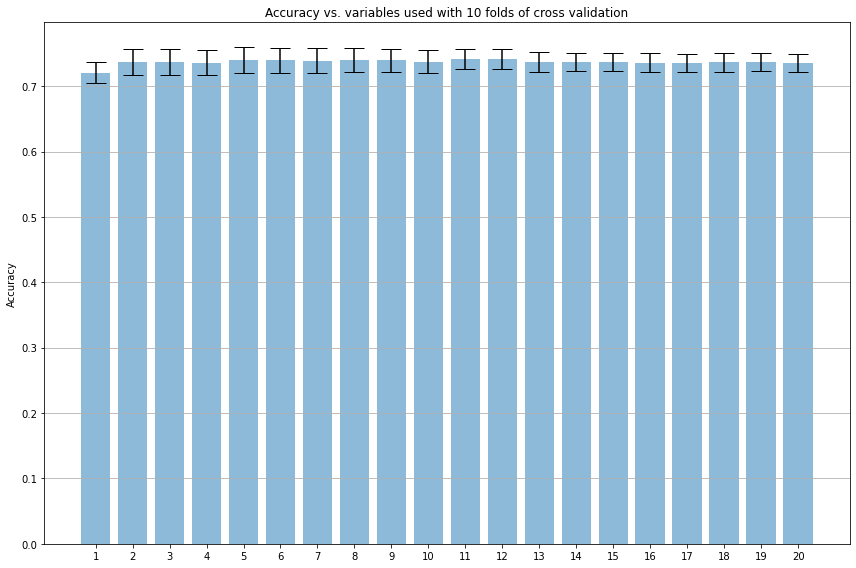

In [153]:
#sns.barplot(mean_att,x=feature_arrays)

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"], mean_att, yerr=std_att, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy')
#ax.set_xticklabels(featureArray, rotation='vertical')
ax.set_title('Accuracy vs. variables used with 10 folds of cross validation')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('dt_att_acc.png',bbox_inches='tight')
plt.show()

## Pre-pruning

In [166]:
min_samples_split_cv = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    scoring=make_scorer(accuracy_score),
    param_grid=ParameterGrid(
        {
            "min_samples_split" : [
                [min_samples_split] for min_samples_split in np.arange(0.001, 1 , 0.025)
            ]
        }
    )
)

min_samples_split_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x00000251CEC3BC70>,
             scoring=make_scorer(accuracy_score))

In [167]:
min_samples_split_cv.best_params_

{'min_samples_split': 0.226}

In [168]:
best_min_samples = min_samples_split_cv.best_estimator_

In [169]:
best_min_samples

DecisionTreeClassifier(min_samples_split=0.226, random_state=42)

In [170]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    classes = ['Not Transported','Transport']
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

              precision    recall  f1-score   support

       False       0.72      0.79      0.76      1293
        True       0.76      0.69      0.72      1263

    accuracy                           0.74      2556
   macro avg       0.74      0.74      0.74      2556
weighted avg       0.74      0.74      0.74      2556

Train score  0.75
Test score  0.74
Train Confusion matrix


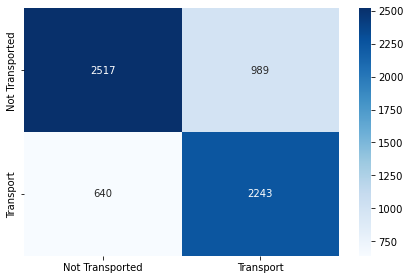

Test Confusion matrix


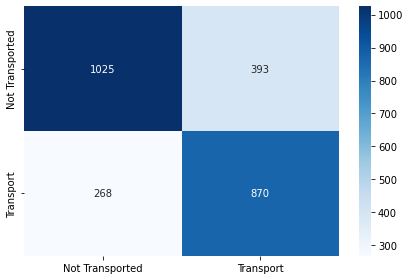

In [171]:
print(classification_report(y_eval,best_min_samples.predict(X_eval)))

y_train_pred = best_min_samples.predict(X_train)
y_test_pred = best_min_samples.predict(X_eval)

print(f'Train score {accuracy_score(y_train_pred,y_train) : .2f}')
print(f'Test score {accuracy_score(y_test_pred,y_eval): .2f}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_eval,dom='Test')


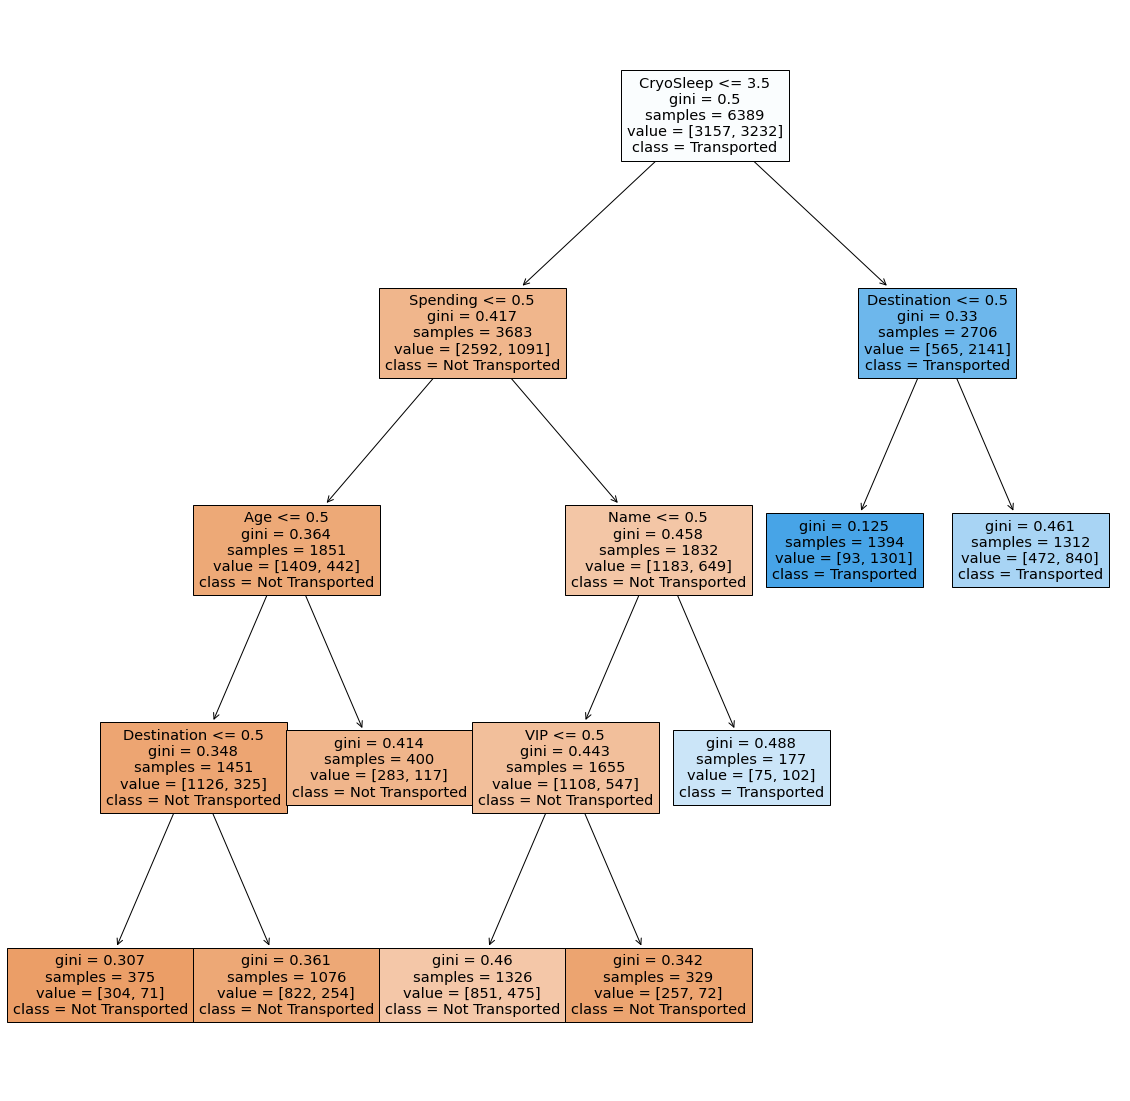

In [172]:
plt.figure(figsize=(20,20))
features = train_data.columns
classes = ['Not Transported','Transported']
tree.plot_tree(best_min_samples,feature_names=features,class_names=classes,filled=True)
plt.show()

## Post-pruning

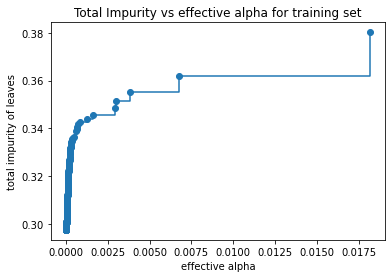

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.savefig('postpruning_alpha.png',bbox_inches='tight')

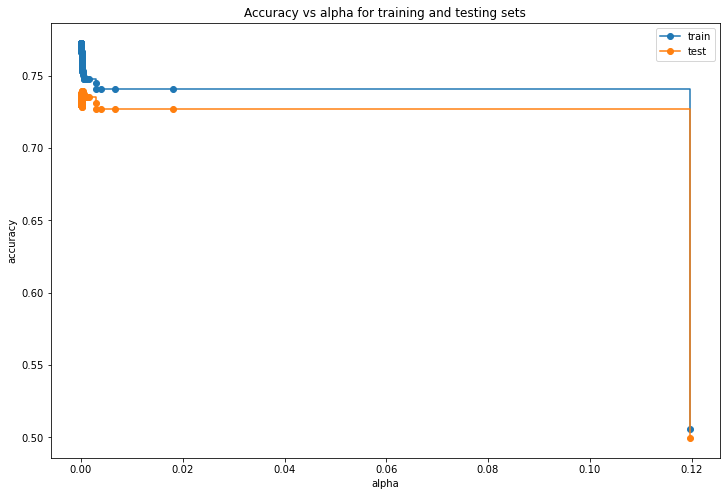

In [144]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.savefig('dt_alpha_acc.png',bbox_inches='tight')
plt.show()

### Depth

In [145]:
#Depth
tree_depths = range(1,25)
scores_cv = []
mean_cv = []
std_cv = []
accuracy_scores = []
for i in tree_depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    cv_scores = cross_val_score(dtc, X, y, cv=10, scoring='accuracy')
    scores_cv.append(cv_scores)
    mean_cv.append(cv_scores.mean())
    std_cv.append(cv_scores.std())
    accuracy_scores.append(dtc.fit(X, y).score(X, y))

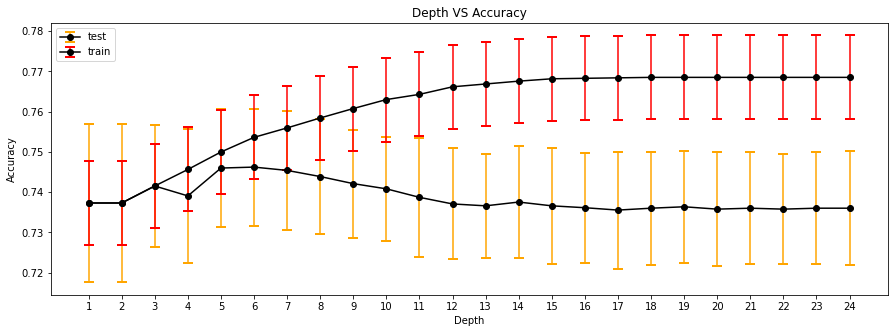

In [156]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
plt.errorbar(tree_depths, mean_cv, std_cv, fmt='-o', color='black', ecolor = 'orange', capthick = 2, capsize = 5, label='test')
plt.errorbar(tree_depths, accuracy_scores, np.std(accuracy_scores), fmt='-o', color='black', ecolor = 'red', capthick = 2, capsize = 5, label='train')
plt.title("Depth VS Accuracy")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
ax.set_xticks(tree_depths)
ax.legend()
plt.savefig('depth.png',bbox_inches='tight')
plt.show()

In [147]:
#fig, ax = plt.subplots(1,1, figsize=(15,5))
#ax.plot(tree_depths, mean_cv, '-o', label='mean cross-validation accuracy', alpha=0.9)
#ax.fill_between(tree_depths, np.array(mean_cv)-2*np.array(std_cv), np.array(mean_cv)+2*np.array(std_cv), alpha=0.2)
#ylim = plt.ylim()
#ax.plot(tree_depths, accuracy_scores, '-o', label='train accuracy', alpha=0.9)
#ax.set_title('Accuracy vs Depth', fontsize=16)
#ax.set_xlabel('Tree depth', fontsize=14)
#ax.set_ylabel('Accuracy', fontsize=14)
#ax.set_ylim(ylim)
#ax.set_xticks(tree_depths)
#ax.legend()

In [148]:
featureArray = []
for i in range(1,21):    
    # feature extraction
    select = SelectKBest(score_func=chi2, k=i)
    fit = select.fit(X, y)
    # summarize scores
    features = fit.transform(X)
    filter = select.get_support()
    features = array(X.columns)
    featureArray.append(features[filter])
    
cv = 10
mean_att = []
std_att = []

mean_att_p = []
std_att_p = []

mean_att_r = []
std_att_r = []

mean_att_f = []
std_att_f = []

for i in featureArray:
    data = X[i]
    dtc = DecisionTreeClassifier()
    scores = cross_val_score(dtc, data, y, scoring='accuracy', cv=cv)
    mean_att.append(np.mean(scores))
    std_att.append(np.std(scores))
    scores = cross_val_score(dtc, data, y, scoring='precision', cv=cv)
    mean_att_p.append(np.mean(scores))
    std_att_p.append(np.std(scores))
    scores = cross_val_score(dtc, data, y, scoring='recall', cv=cv)
    mean_att_r.append(np.mean(scores))
    std_att_r.append(np.std(scores))
    scores = cross_val_score(dtc, data, y, scoring='f1', cv=cv)
    mean_att_f.append(np.mean(scores))
    std_att_f.append(np.std(scores))
    
    #print(i)
    #print('Mean accuracy:', round(np.mean(scores),3))
    #print('Standard deviation:', round(np.std(scores),3))
    #print("\n")

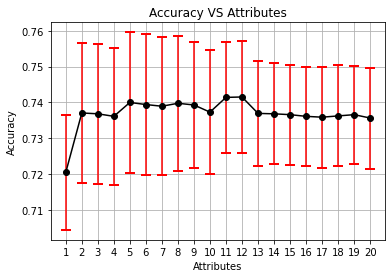

In [149]:
plt.errorbar(["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"], mean_att, std_att, fmt='-o', color='black', ecolor = 'red', capthick = 2, capsize = 5)

plt.title("Accuracy VS Attributes")
plt.xlabel("Attributes")
plt.ylabel("Accuracy")

plt.grid()
plt.savefig('dt2_att_acc.png',bbox_inches='tight')
plt.show()

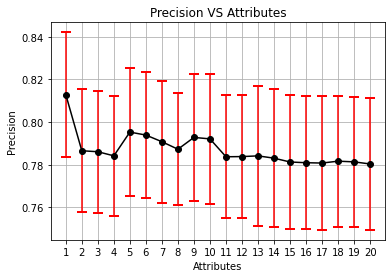

In [150]:
plt.errorbar(["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"], mean_att_p, std_att_p, fmt='-o', color='black', ecolor = 'red', capthick = 2, capsize = 5)

plt.title("Precision VS Attributes")
plt.xlabel("Attributes")
plt.ylabel("Precision")

plt.grid()
plt.savefig('dt2_pr_acc.png',bbox_inches='tight')
plt.show()

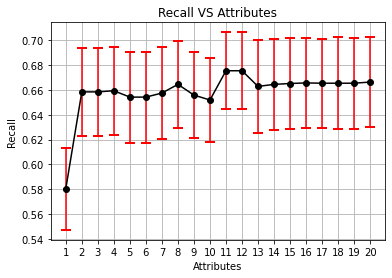

In [151]:
plt.errorbar(["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"], mean_att_r, std_att_r, fmt='-o', color='black', ecolor = 'red', capthick = 2, capsize = 5)

plt.title("Recall VS Attributes")
plt.xlabel("Attributes")
plt.ylabel("Recall")

plt.grid()
plt.savefig('dt2_rec_acc.png',bbox_inches='tight')
plt.show()

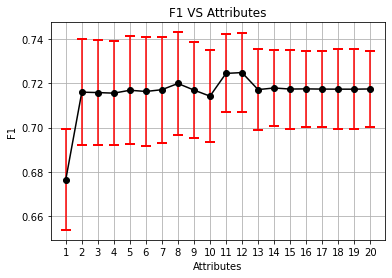

In [152]:
plt.errorbar(["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"], mean_att_f, std_att_f, fmt='-o', color='black', ecolor = 'red', capthick = 2, capsize = 5)

plt.title("F1 VS Attributes")
plt.xlabel("Attributes")
plt.ylabel("F1")

plt.grid()
plt.savefig('dt2_f1_acc.png',bbox_inches='tight')
plt.show()